In [7]:
%run 'kaggle_downloads.ipynb'

Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company.
They have the following question: what’s likely to make the employee leave the company?

This projects goal is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If employees likely to quit is predictable, it might be possible to identify factors that contribute to their leaving.
Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

This analysis is performed on the deepakkumarinv/hr-capstone-dataset from Kaggle.


In [116]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV

In [8]:
#Load data
df0 = pd.read_csv(hr_capstone_data)

In [9]:
#Examine the dataset
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
# Standardize columns

# Check current names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
# Rename columns to fit a consistent naming convention in this case we will use snake_case

column_names = {'satisfaction_level': 'satisfaction_level',
                'last_evaluation': 'last_evaluation',
                'number_project': 'number_project',
                'average_montly_hours': 'average_monthly_hours',
                'time_spend_company': 'time_spend_company',
                'Work_accident': 'work_accident',
                'left': 'left',
                'promotion_last_5years': 'promotion_last_5years',
                'Department': 'department',
                'salary': 'salary'}

df0.rename(columns=column_names, inplace=True)

# Confirm new names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [14]:
# Check data for null values

df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [15]:
# Check for duplicate data
df0.duplicated().sum()

3008

In [17]:
# Drop duplicated data and save as a new dataset
df1 = df0.drop_duplicates()
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='left', ylabel='time_spend_company'>

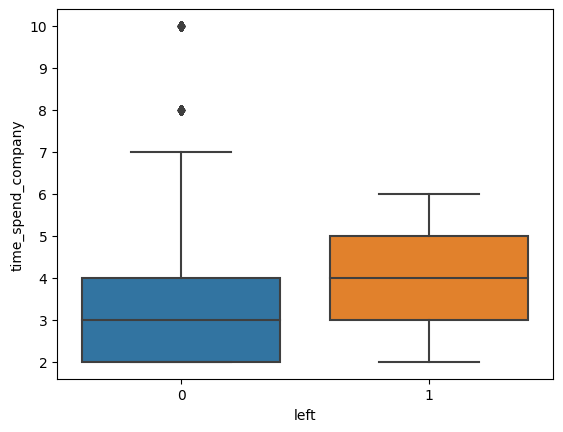

In [26]:
# Check for outliers of tenure
sns.boxplot(y=df1['time_spend_company'], x=df1['left'])

In [19]:
# Find the outlier count
df1[df1['time_spend_company'] >= 7].shape

(282, 10)

In [21]:
# Get count and percentage of people who left vs. stayed
num_total = len(df1)
num_stayed = len(df1[df1['left'] == 0])
num_left = len(df1[df1['left'] == 1])
print('stayed ', num_stayed)
print('left ', num_left)
print('%stayed ', (num_stayed/num_total) * 100)
print('%left ', (num_left/num_total) * 100)

stayed  10000
left  1991
%stayed  83.39588024351598
%left  16.604119756484028


In [23]:
# Create a new column to represent salary categories numerically
def salary_format(data):
    if data == 'low':
        return 0
    elif data == 'medium':
        return 1
    else:
        return 2
    
df1.loc[:, 'salary_numeric'] = df1['salary'].apply(salary_format)

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,salary_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [24]:
# Function for getting percentage values of visualized data
def get_percentages(data_frame, main_group, sub_group):
    groups = [main_group, sub_group]
    data = data_frame.groupby(groups).size().reset_index(name='count')
    main_group_totals = data_frame.groupby(main_group).size().reset_index(name='total')
    results = data.merge(main_group_totals, on=main_group, how='inner')
    results['percent'] = round((results['count']/results['total']) * 100)
    return results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

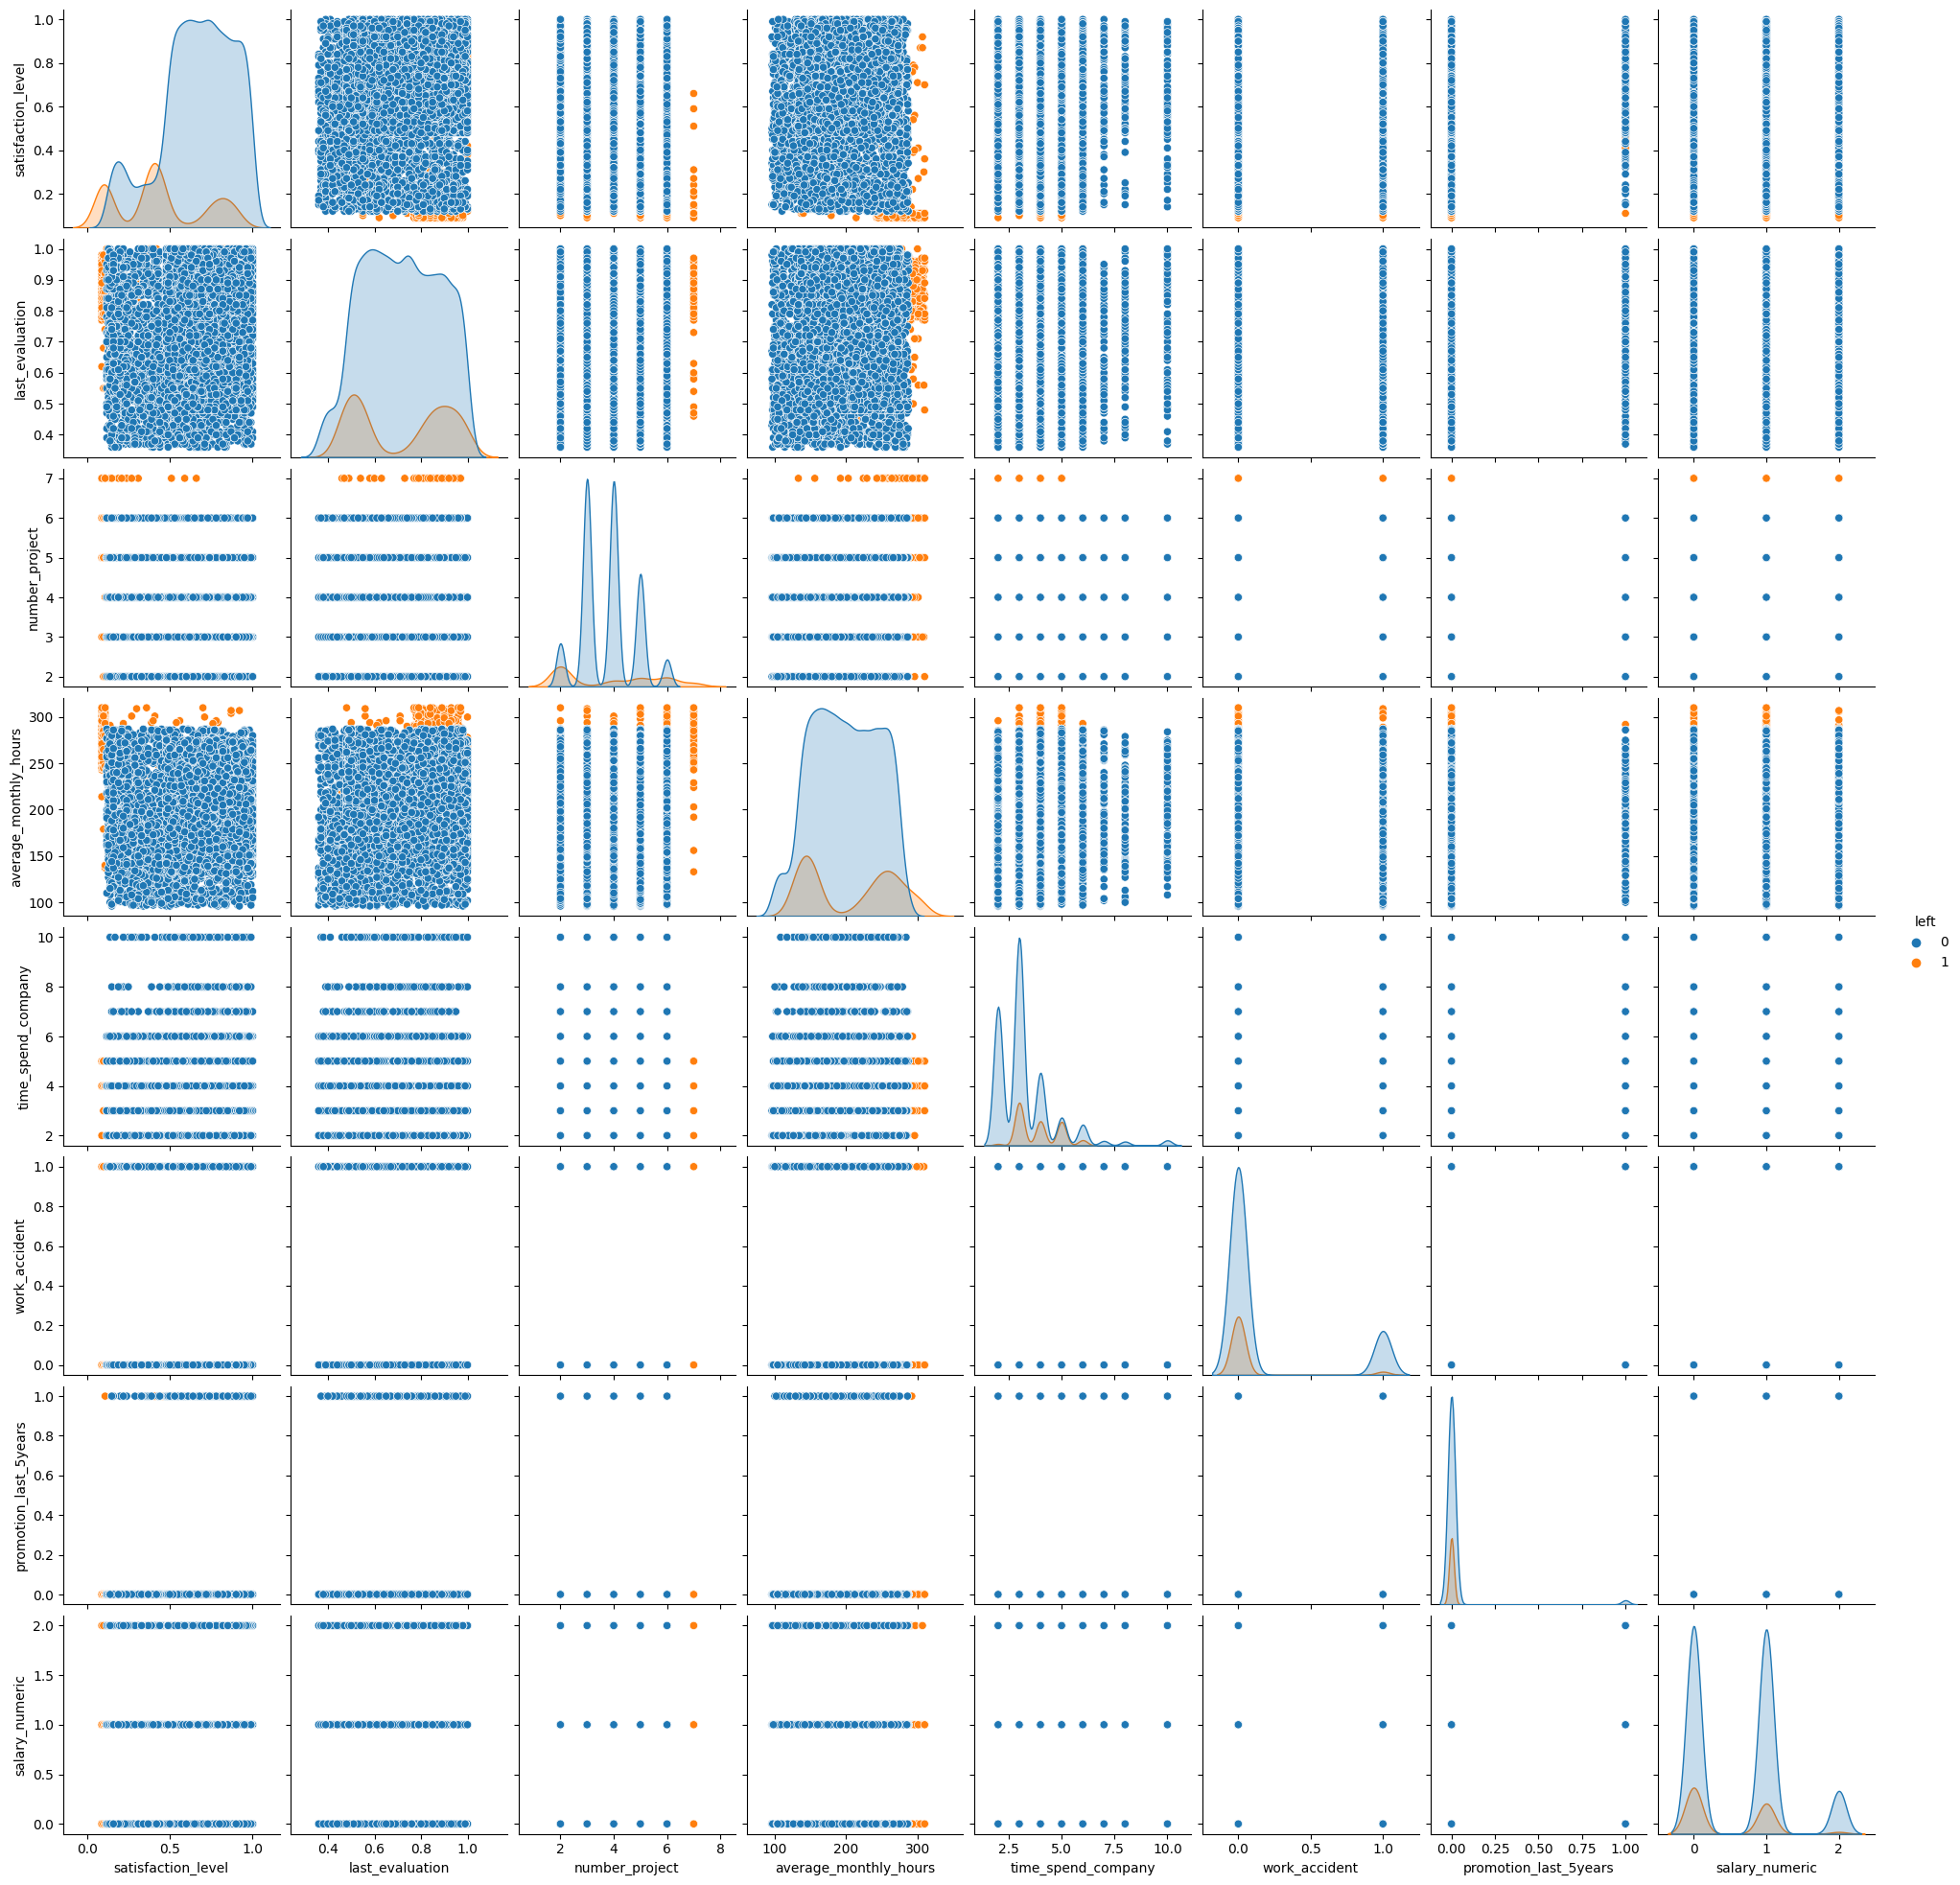

In [25]:
# Perform exploratory data analysis using visualizations

# Create a pairplot to see how variables relate to eachother
sns.pairplot(df1, hue='left')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='department', ylabel='salary_numeric'>

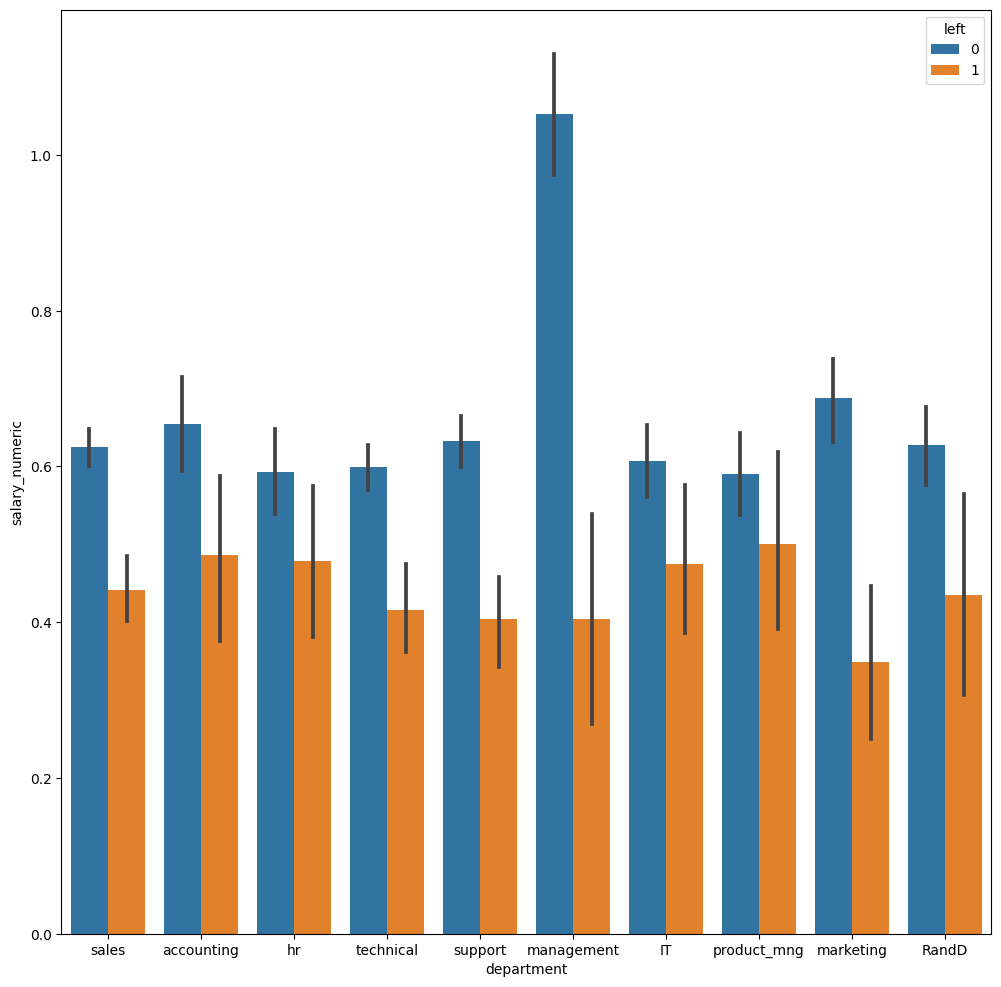

In [29]:
# Plot department and salary and compare employees who left
plt.figure(figsize=(12, 12))
sns.barplot(data=df1, x='department', y='salary_numeric', hue='left')

In [30]:
# Get percentage values for the plot
get_percentages(df1, 'department', 'left')

,department,left,count,total,percent
0,IT,0,818,976,84.0
1,IT,1,158,976,16.0
2,RandD,0,609,694,88.0
3,RandD,1,85,694,12.0
4,accounting,0,512,621,82.0
5,accounting,1,109,621,18.0
6,hr,0,488,601,81.0
7,hr,1,113,601,19.0
8,management,0,384,436,88.0
9,management,1,52,436,12.0


From this graph we can see across all departments the salary for employees who left was less than the ones who stayed. The employees who left, regardless of department, on average were payed less than the lowest average of those who stayed. The most significant difference in pay being in management. Looking at each department we can also see that the percent of people who leave ranges from 12% to 19% with management being the lowest rate of leaving at 12% and HR being the most likely to leave at 19% visualized in the following histogram.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='department', ylabel='Count'>

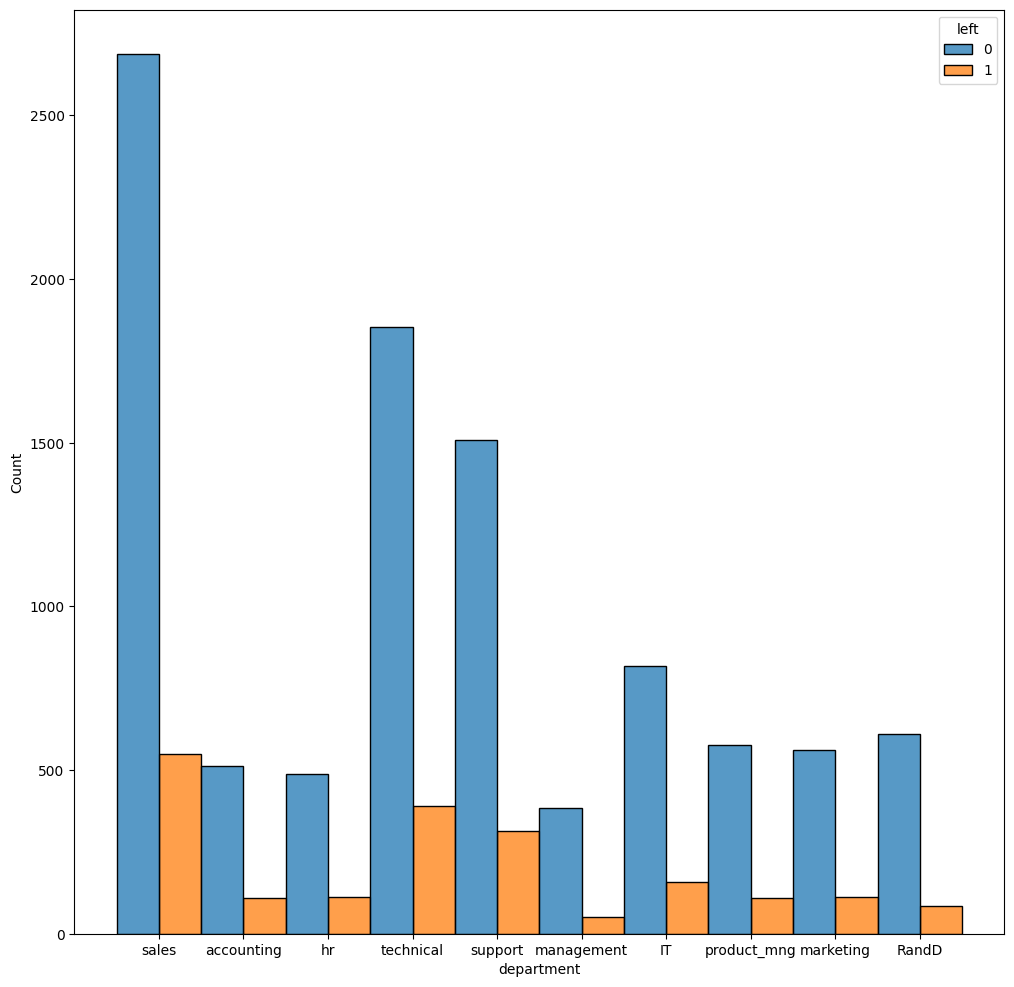

In [32]:
plt.figure(figsize=(12, 12))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='average_monthly_hours', ylabel='satisfaction_level'>

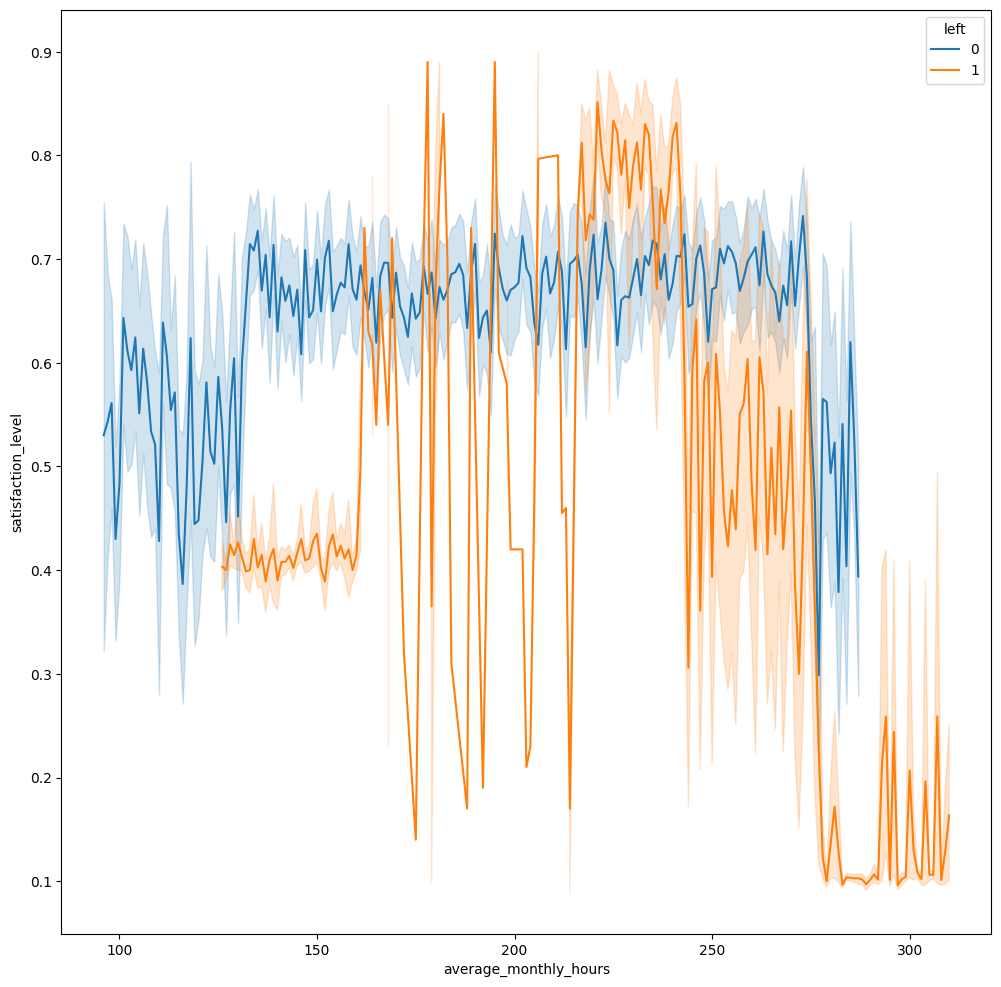

In [36]:
# Check the relationship between employee satisfaction and average monthly hours using a line plot
plt.figure(figsize=(12, 12))
sns.lineplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left')

This line plot shows a trend between satisfied employees and hours for those who stay VS leave. Satisfaction for employees below ~125 hours or above ~275 hours is noticably lower than those between those hours for employees who stay. Employees who leave remain at a low satisfaction until ~175 hours at which point the level of satisfaction fluctuates dramatically between highs and extreme lows. The satisfaction of employees who leave is much less stable than for those who stayed. After around ~280 hours all employees leave the company.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='number_project', ylabel='Count'>

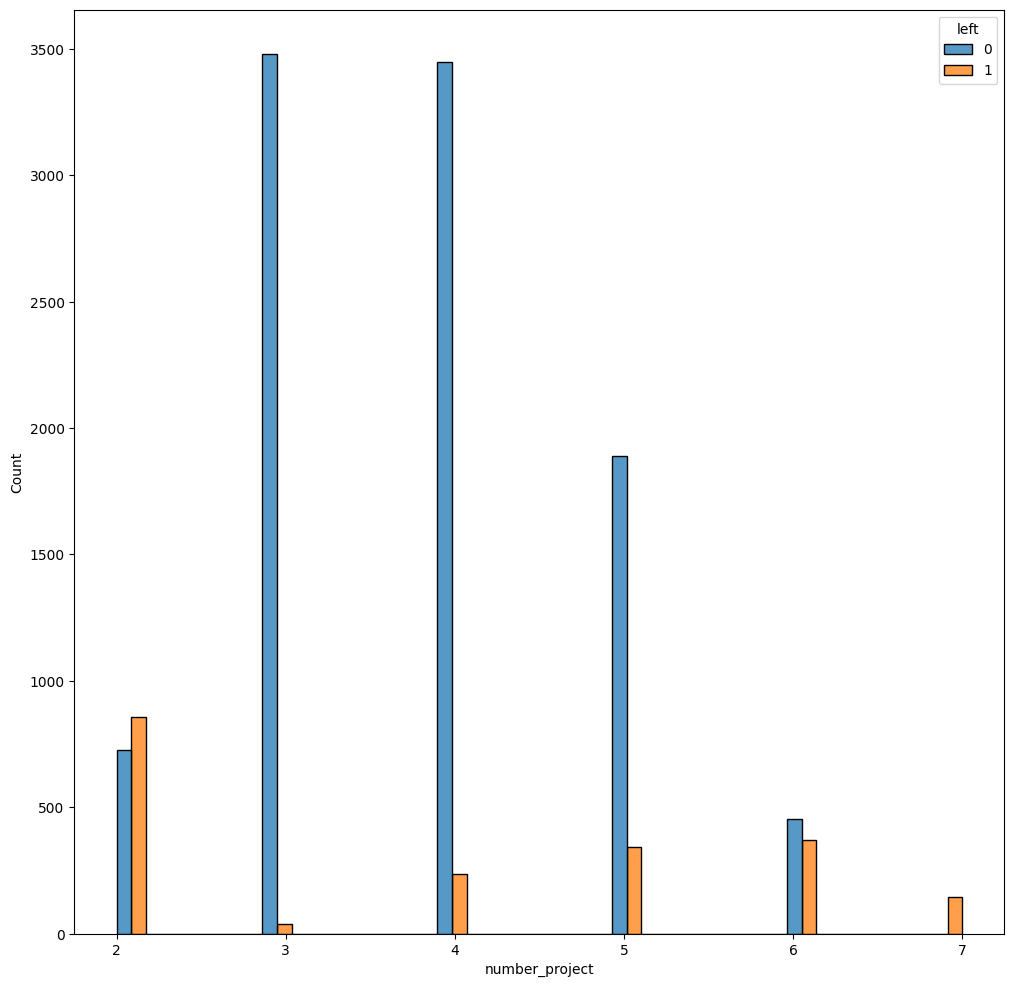

In [37]:
# plot the count of employees by number of projects and compare those who left to those who stayed
plt.figure(figsize=(12, 12))
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge')

In [38]:
get_percentages(df1, 'number_project', 'left')

,number_project,left,count,total,percent
0,2,0,725,1582,46.0
1,2,1,857,1582,54.0
2,3,0,3482,3520,99.0
3,3,1,38,3520,1.0
4,4,0,3448,3685,94.0
5,4,1,237,3685,6.0
6,5,0,1890,2233,85.0
7,5,1,343,2233,15.0
8,6,0,455,826,55.0
9,6,1,371,826,45.0


From this graph we can see that based on the number of projects an employee is most likely to quit given only 2 projects or given 7 projects. If given two projects 54% of employees left and if given 7 projects employees left 100% of the time. employees with 3 projects were very unlikely to leave at only 1%. The rate of employees leaving increases from there to 6% then 15% then 45% respective to each additional project. It seems 3 to 5 projects is ideal for employee retention.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

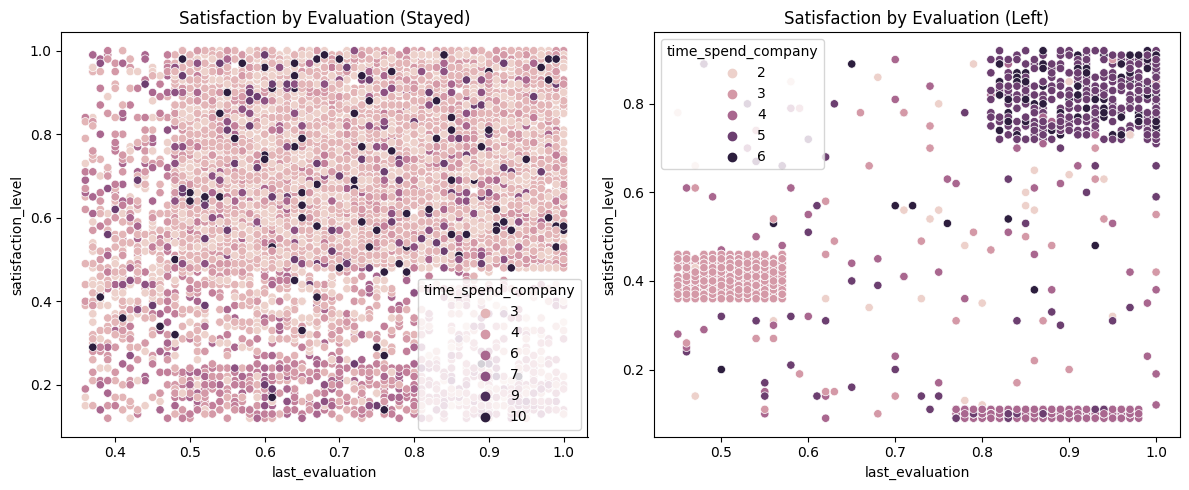

In [40]:
# Create plots to compare employee satisfaction and evaluation scores using the hue show employee tenure
# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot for "Stayed" group
sns.scatterplot(data=df1[df1['left'] == 0], x='last_evaluation', y='satisfaction_level', hue='time_spend_company', ax=axes[0])
axes[0].set_title('Satisfaction by Evaluation (Stayed)')

# Scatterplot for "Left" group
sns.scatterplot(data=df1[df1['left'] == 1], x='last_evaluation', y='satisfaction_level', hue='time_spend_company', ax=axes[1])
axes[1].set_title('Satisfaction by Evaluation (Left)')

plt.tight_layout()

plt.show()

From these scatterplots we can conclude some trends in those who stays and leaves the company based on satisfaction and evaluation. Employees who stay are dispersed fairly evenly through the plot with a large cluster forming around .5+ satisfaction and .5+ evaluation. There is also a second cluster below .3 satisfaction and a .5+ evaluation that seems to be composed of employees who have been at the company for a longer period. The rest of the plot shows tenure fairly evenly dispersed.

On the second plot we can see three clusters of employees who leave the company each with fairly distinct tenure. a cluster (A) between .3 and .5 satisfaction and .4 to .6 evaluation composed of emplyees who have been with the company for 3 or less years. A second cluster (B) at a satisfaction less than .2 and evaluation between .75 and 1 who are mostly composed of employees with tenure of 4 to 5 years. Finally a third cluster (C) and the largest cluster is surprisingly a high satisfaction leve of .7+ and an evaluation of .8+ composed mostly of employes with tenure of 5 to 6 years. This final cluster might be due to compitent employees finding new job oportunities with higher pay, or entering retirement.



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

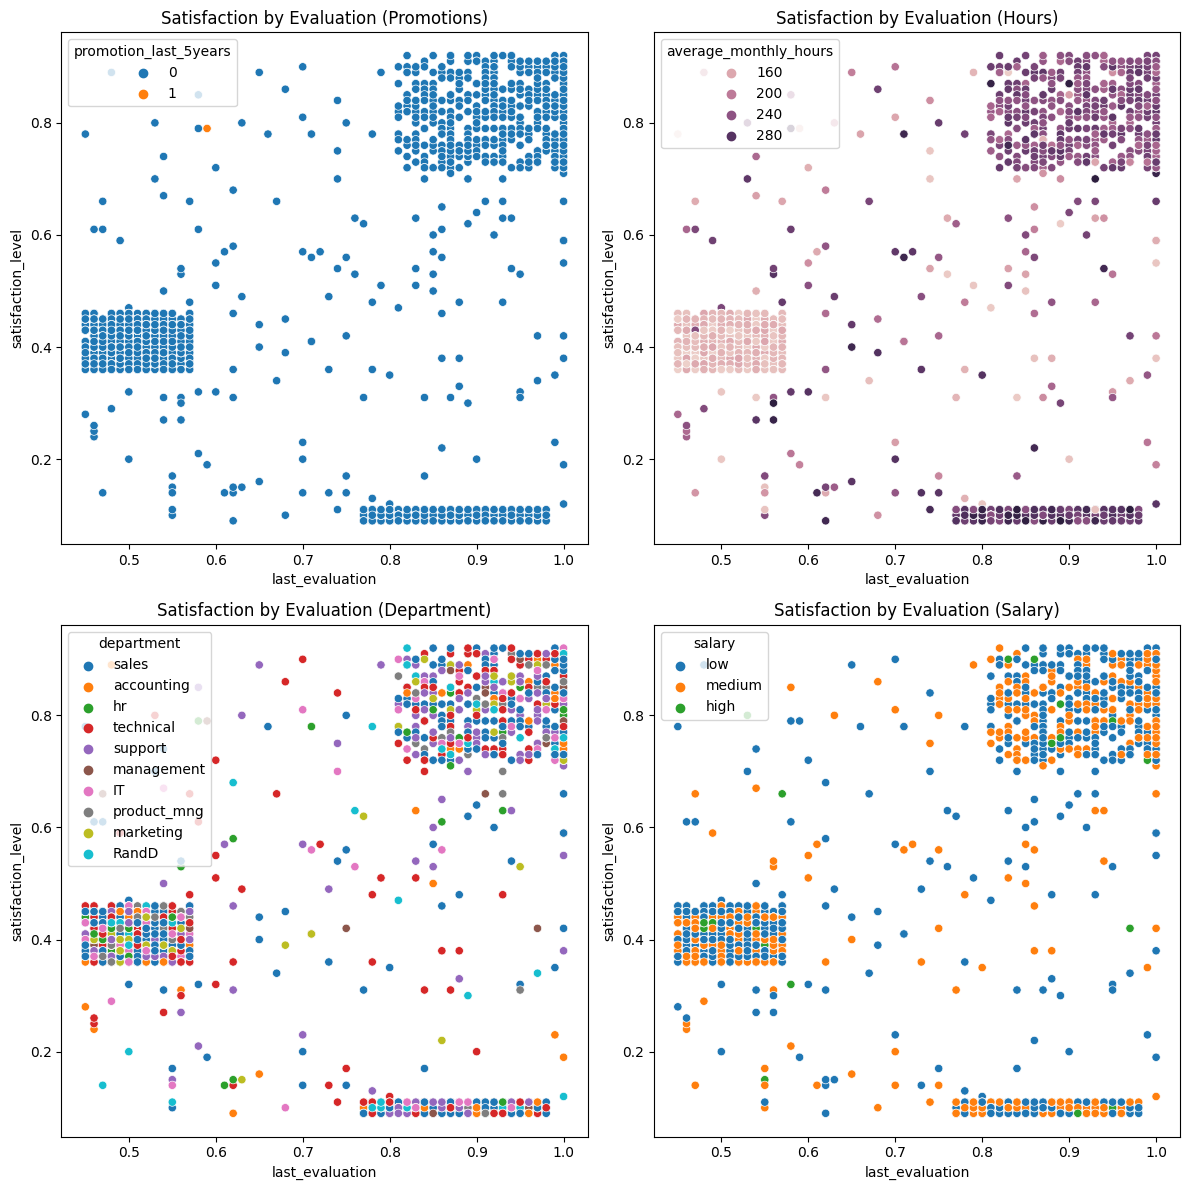

In [48]:
# Create a series of plots to further explore the patterns among the employees who left based on the previous plots


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Scatterplot for promotions of left employees
sns.scatterplot(data=df1[df1['left'] == 1], x='last_evaluation', y='satisfaction_level', hue='promotion_last_5years', ax=axes[0][0])
axes[0][0].set_title('Satisfaction by Evaluation (Promotions)')

# Scatterplot for hours of left employees
sns.scatterplot(data=df1[df1['left'] == 1], x='last_evaluation', y='satisfaction_level', hue='average_monthly_hours', ax=axes[0][1])
axes[0][1].set_title('Satisfaction by Evaluation (Hours)')

# Scatterplot for department of left employees
sns.scatterplot(data=df1[df1['left'] == 1], x='last_evaluation', y='satisfaction_level', hue='department', ax=axes[1][0])
axes[1][0].set_title('Satisfaction by Evaluation (Department)')

# Scatterplot for salary of left employees
sns.scatterplot(data=df1[df1['left'] == 1], x='last_evaluation', y='satisfaction_level', hue='salary', ax=axes[1][1])
axes[1][1].set_title('Satisfaction by Evaluation (Salary)')

plt.tight_layout()

plt.show()


Further analysis of the clusters of employees who left we can see promotions were extremely rare for all employees who left.
Hours were much less for cluster A. Clusters B and C had much higher hours with cluster B having slightly more hours than cluster C.
Department seems to be fairly evenly distributed among the clusters further investigation into department will be done.
Salary also seems to be fairly evenly distributed among the clusters.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='average_monthly_hours', ylabel='Count'>

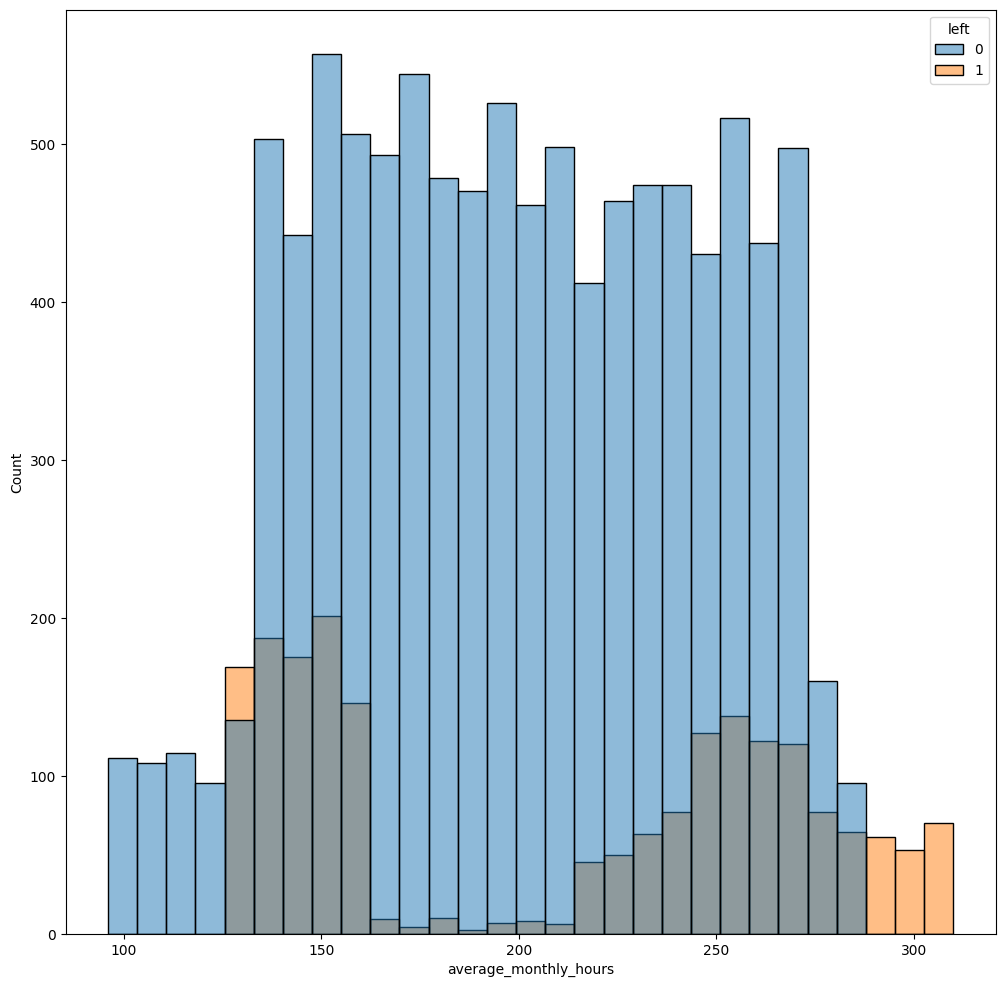

In [47]:
# Create a histogram to examine patterns based on average monthly hours
plt.figure(figsize=(12, 12))
sns.histplot(data=df1, x='average_monthly_hours', hue='left')

Average hours shows a fairly uniform distribution among employees who stayed with a slight normal distribution having small tails on either side but mostly uniform. Employees who left however are a more bimodal distribution at the lower and upper end of hours worked. Most employees stay working less than 125 hours. Another group likely not to leave work between ~160 to ~220 hours a month. Outside those ranges employees become more likely to leave. Above ~280 hours a month employees are near certain to leave.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='salary', ylabel='Count'>

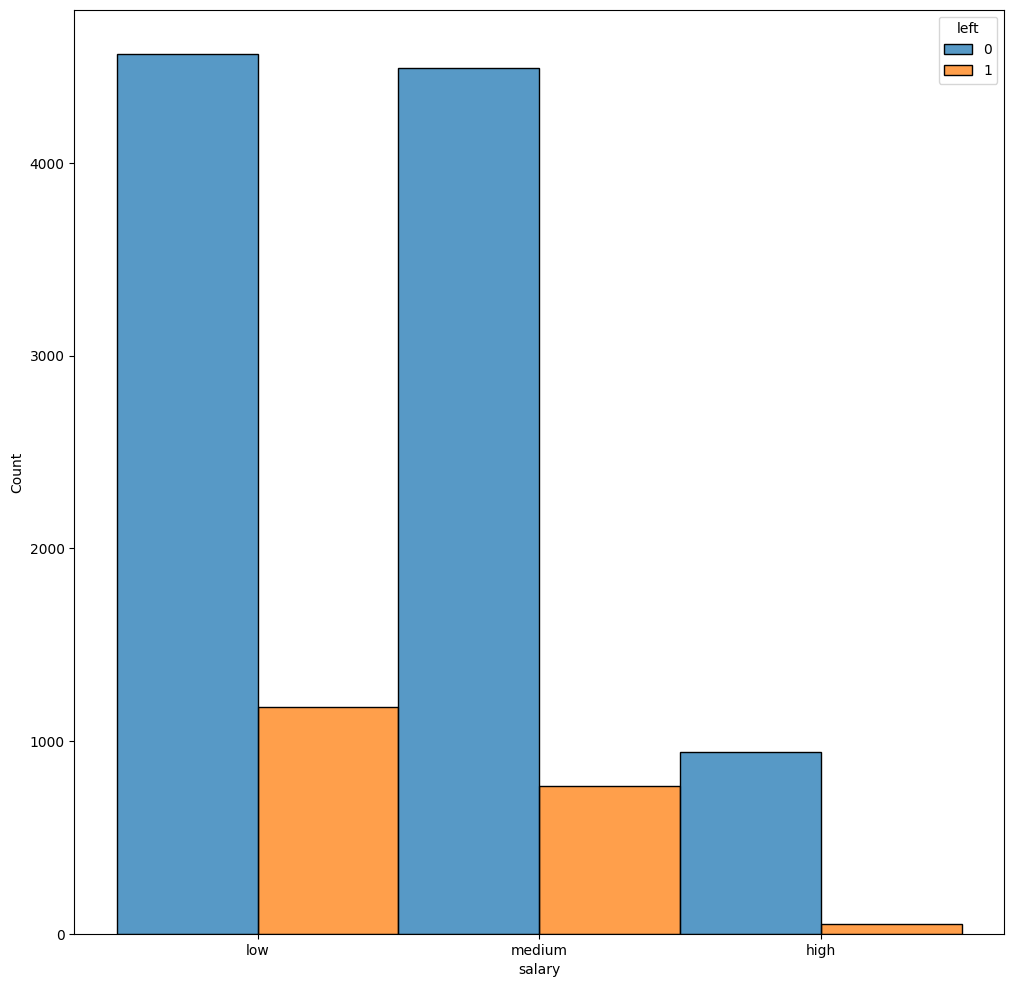

In [46]:
# Create a histogram of employee salary 
plt.figure(figsize=(12, 12))
sns.histplot(data=df1, x='salary', hue='left', multiple='dodge')

In [49]:
get_percentages(df1, 'salary', 'left')

,salary,left,count,total,percent
0,high,0,942,990,95.0
1,high,1,48,990,5.0
2,low,0,4566,5740,80.0
3,low,1,1174,5740,20.0
4,medium,0,4492,5261,85.0
5,medium,1,769,5261,15.0


Low salary employees are much more likely to leave. 20% of low salary employees leave, 15% of medium salary employees leave and only 5% of high salary employees leave. Increasing salary for low and medium levels might help employee retention, but It will need to be done carefully as to be afordable for the company and fair to the high salary employees.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='satisfaction_level', ylabel='Count'>

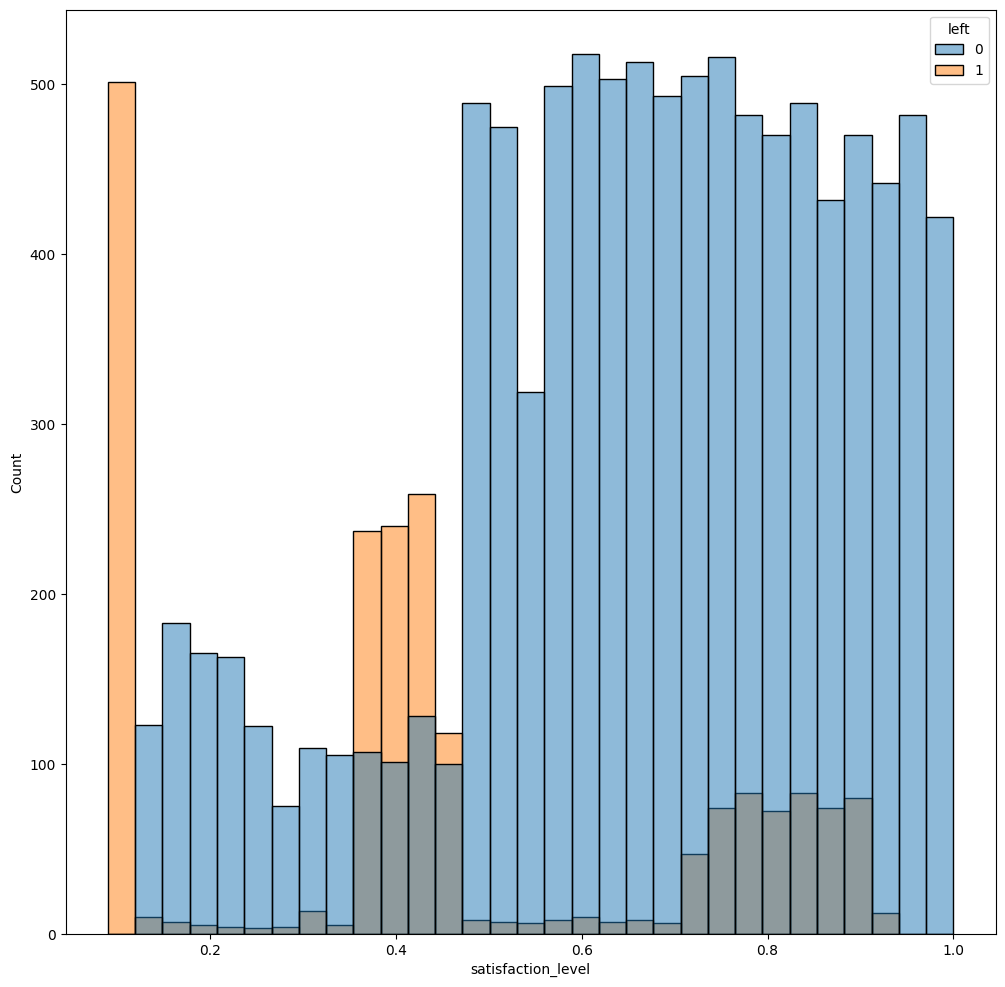

In [51]:
# Create a histogram of employee satisfaction
plt.figure(figsize=(12, 12))
sns.histplot(data=df1, x='satisfaction_level', hue='left')

Extremely low satisfaction unsurprisingly has the highest rate of leaving, however this falls off dramatically immediately after satisfaction goes above the minimum. It remains low until satisfaction is aound .4 at which point employees become more likely to leave than stay. as satisfaction aproaches .5 the rate of leaving falls off again to very minimal levels. It then increases again, though not as significantly from satisfaction levels of .7 to .9.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='last_evaluation', ylabel='Count'>

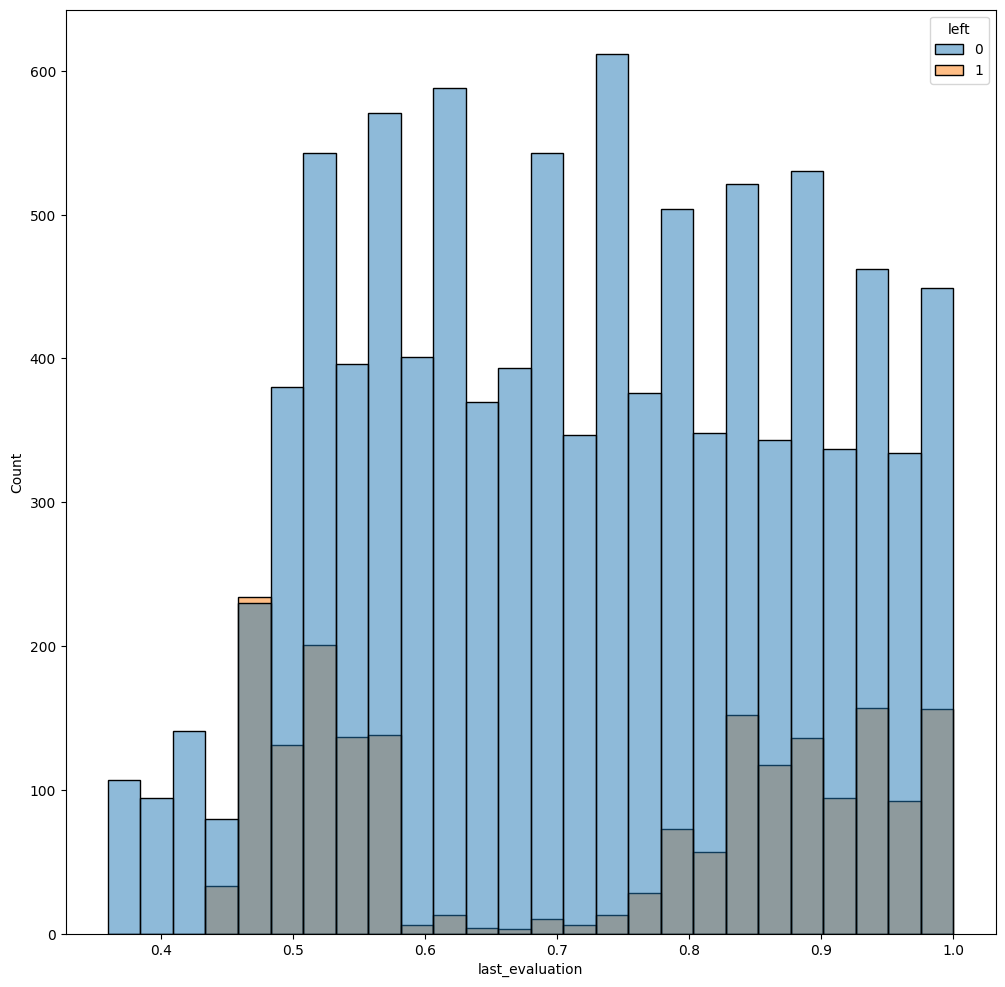

In [53]:
# Create a histogram for employee evaluation
plt.figure(figsize=(12, 12))
sns.histplot(data=df1, x='last_evaluation', hue='left')

There is a bimodal distribution of employees who leave given certain evaluation scores with bumps happening around .5 and .9

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='time_spend_company', ylabel='Count'>

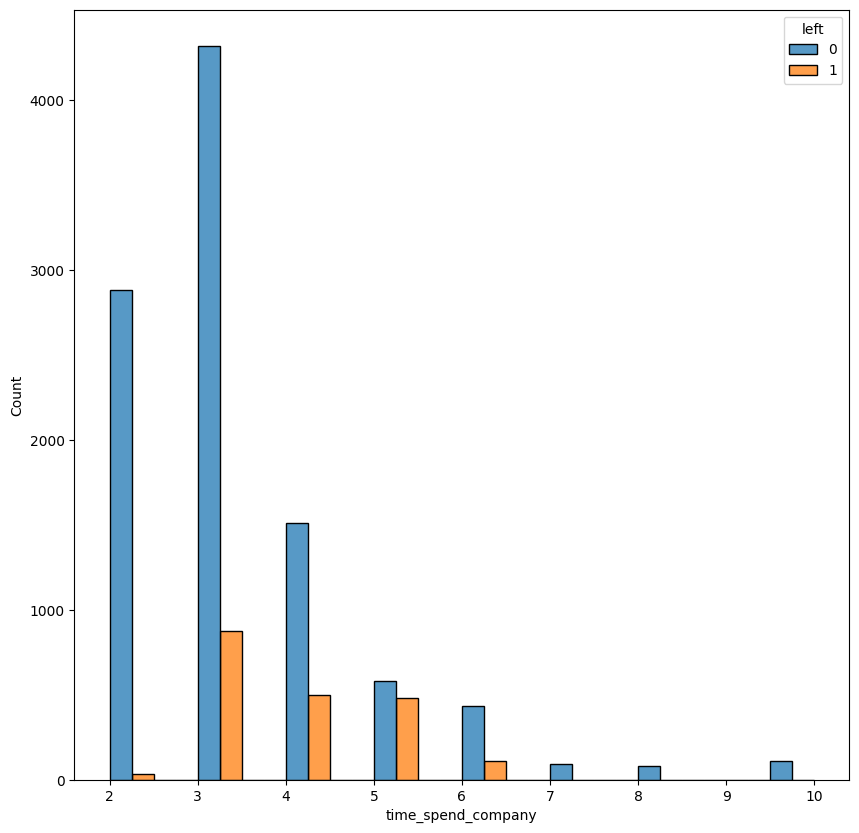

In [58]:
# Create a histogram to visualize employee tenure
plt.figure(figsize=(10, 10))
sns.histplot(data=df1, x='time_spend_company', hue='left', multiple='dodge', binwidth=.5)

In [59]:
get_percentages(df1, 'time_spend_company', 'left')

,time_spend_company,left,count,total,percent
0,2,0,2879,2910,99.0
1,2,1,31,2910,1.0
2,3,0,4316,5190,83.0
3,3,1,874,5190,17.0
4,4,0,1510,2005,75.0
5,4,1,495,2005,25.0
6,5,0,580,1062,55.0
7,5,1,482,1062,45.0
8,6,0,433,542,80.0
9,6,1,109,542,20.0


The largest number of employees to leave based on their tenure is at a 3 year tenure, but it is also the highest rate for those who stay and of 3 year employees 83% stay. 4 and 5 years there is a smaller quantity of employees that leave but proportionally the rate increases with 5 years being split nearly evenly at 45% of employees leaving. The rate drops again at 6 years with 80% of employees staying. After 6 years the number of employees that leave drops to 0%.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='promotion_last_5years', ylabel='Count'>

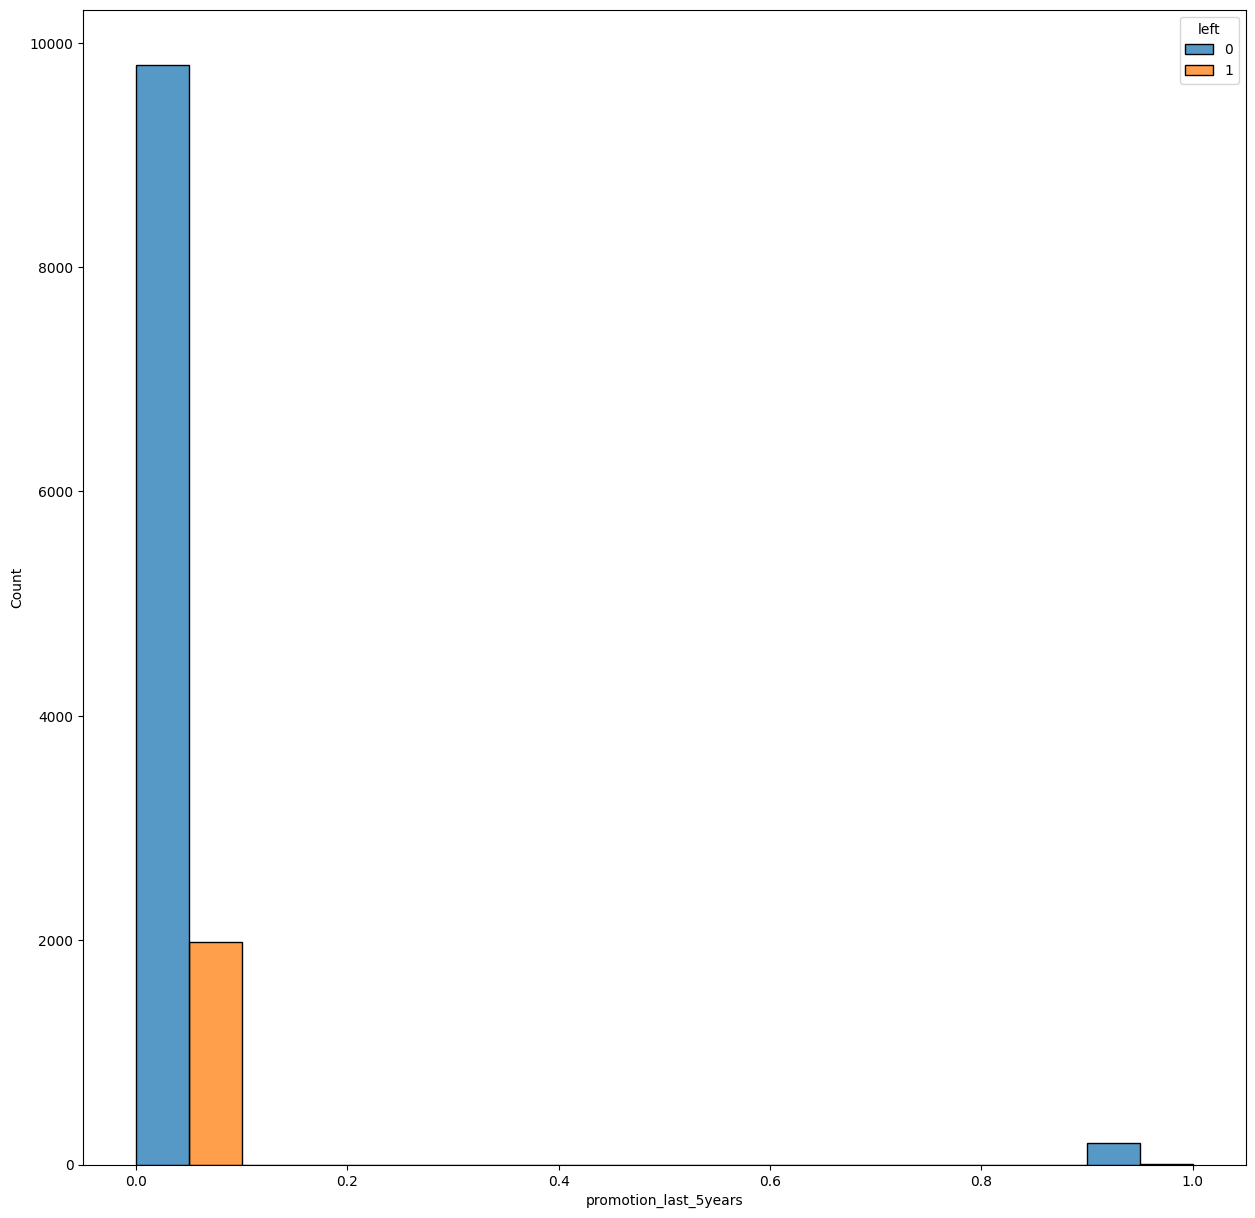

In [65]:
plt.figure(figsize=(15, 15))
sns.histplot(data=df1, x='promotion_last_5years', hue='left', multiple='dodge', binwidth=.1)

In [66]:
get_percentages(df1, 'promotion_last_5years', 'left')

,promotion_last_5years,left,count,total,percent
0,0,0,9805,11788,83.0
1,0,1,1983,11788,17.0
2,1,0,195,203,96.0
3,1,1,8,203,4.0


Promotions are rare but given the available data those who recieved a promotion in the last 5 years only left 4% of the time while the remaining employees leave 17% of the time. Perhaps considering more options for promotions can increase employee retention giving them assurance that the company values their efforts. This would also help address the rate employees leave because of their salary.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='last_evaluation', ylabel='promotion_last_5years'>

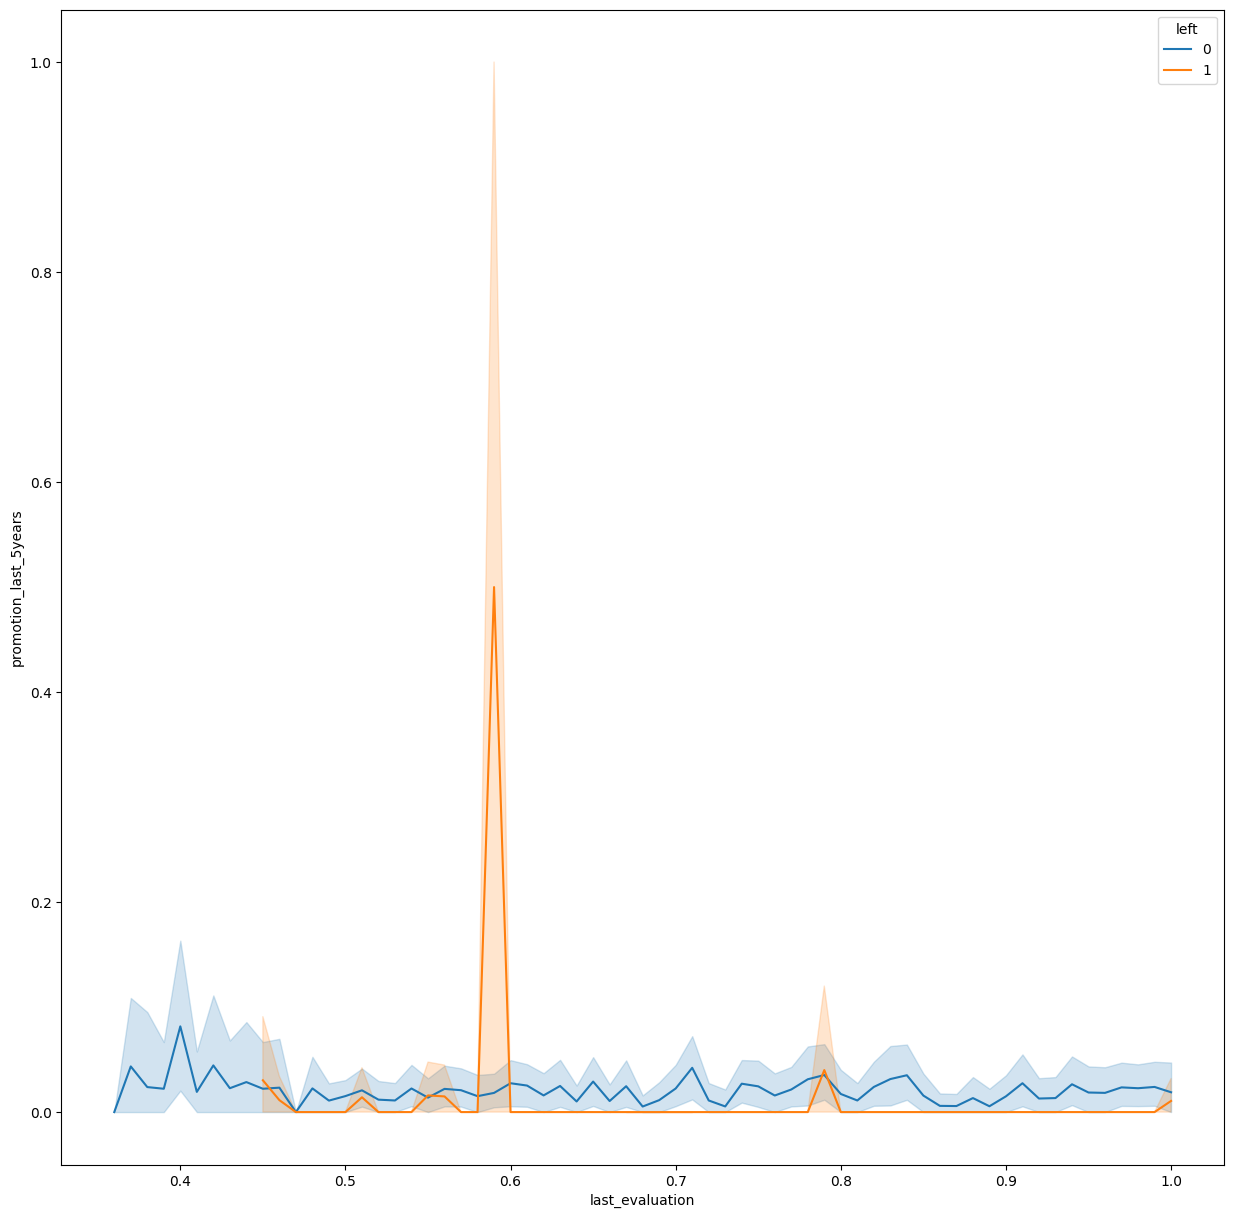

In [67]:
# Create a line plot to visualize evaluations relationship with promotions
plt.figure(figsize=(15, 15))
sns.lineplot(data=df1, x='last_evaluation', y='promotion_last_5years', hue='left')

In this graph we can see that while promotion levels are low for both groups there is an interesting spike for employees who were promoted but left at just below a 6 evaluation level. Perhapse being capable enough to earn a promotion but not earning a high evaluation score left them feeling poorly about their position at the company. We can also note that employees with higher evaluation scores who left got little to no promotions. This is likely a reflection of their evaluation not being reflected in their advamcement in the company.




Insights gathered from visualization and EDA

There are a few notable trends among employees who leave.

Hours worked each month has some apparent trends with a sweet spot between a bimodal distribution where employees are unlikely to leave, and a point at which all employees leave when working around 300 hours.

Satisfaction level is also a good indicator with 3 zones of the distribution where leaving becomes significantly more likely. Extremely low satisfaction results in a virtually constant rate of leaving, another very significant area for leaving is around .4 satisfaction level where more employees leave than stay, finally another bump though not as significant happens around .7 to .9 satisfaction.

These 3 groups can also be seen when compared against the most recent evaluation which forms 3 distinct clusters where employees are far more likely to leave. Low satisfaction employees who leave often have an evaluation of .75 or above, Mid satisfaction employees usually have a lower evaluation between .4 and .57, and high satisfaction employees once again often have higher evaluation scores between .8 and 1.

Salary sees a definite trend where the lower the salary the more likely to leave and high salary being very unlikely to leave. For each salary bracket from low to high the percent of employees who leave are 20%, 15%, and 5%

The time spent with the company also shows a region where employees are more likely to leave. 3 years is the highest number of employees that leave, however thats also the year with the most employees that stay over all even though the quantity of those who leave is high it still has an 83% retention. Less employees leave at 4 and 5 years, but the percent of emplyees that leave are 25% at 4 years and 45% at 5 years. At 6 years emplyee retention goes back up to 80% and beyond that retention is 100%

In [68]:
# Create predictive models and determine which model has the best predictive power

# Prepare data for modeling

# Remove outlier data.
df2 = df1[df1['time_spend_company'] < 8]

# Encode categorical data
df2 = pd.get_dummies(df2, columns=['department'])

In [69]:
# Verify new dataframe

df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'salary_numeric', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')

In [70]:
# Set up train and test data

X = df2[['satisfaction_level',
         'last_evaluation',
         'number_project',
         'average_monthly_hours',
         'time_spend_company',
         'work_accident',
         'promotion_last_5years',
         'salary_numeric',
         'department_IT',
         'department_RandD',
         'department_accounting',
         'department_hr',
         'department_management',
         'department_marketing',
         'department_product_mng',
         'department_sales',
         'department_support',
         'department_technical'
        ]]
y = df2['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# Fit a logistic regression to the data
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [72]:
clf.coef_

array([[-3.74565707,  0.74116395, -0.33007942,  0.00398878,  0.52640643,
        -1.31449766, -1.15390671, -0.61847778, -0.16077626, -0.50054086,
        -0.14756049, -0.01686403, -0.25127717,  0.11201034, -0.01607018,
         0.00900108,  0.06528184, -0.02206571]])

In [73]:
clf.intercept_

array([-0.92886145])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


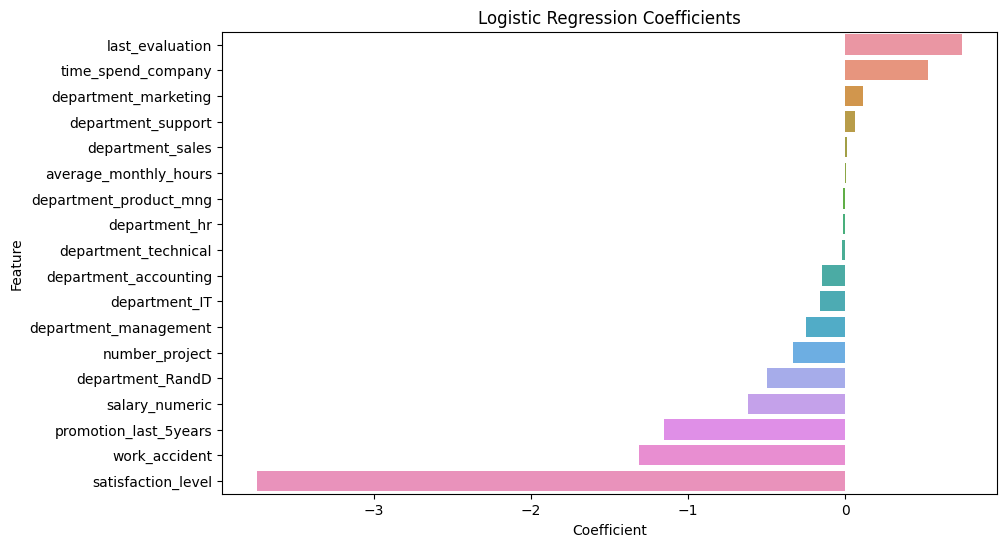

In [74]:
#Plot coefficients

coefficients = clf.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({'Coefficient': coefficients, 'Feature': feature_names})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

In [76]:
# Get detailed coefficients
coef_df

,Coefficient,Feature
1,0.741164,last_evaluation
4,0.526406,time_spend_company
13,0.112010,department_marketing
16,0.065282,department_support
15,0.009001,department_sales
3,0.003989,average_monthly_hours
14,-0.016070,department_product_mng
11,-0.016864,department_hr
17,-0.022066,department_technical
10,-0.147560,department_accounting


In [77]:
#run predictions

y_pred = clf.predict(X_test)

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.817848
Precision: 0.410480
Recall: 0.155629
F1 Score: 0.225690


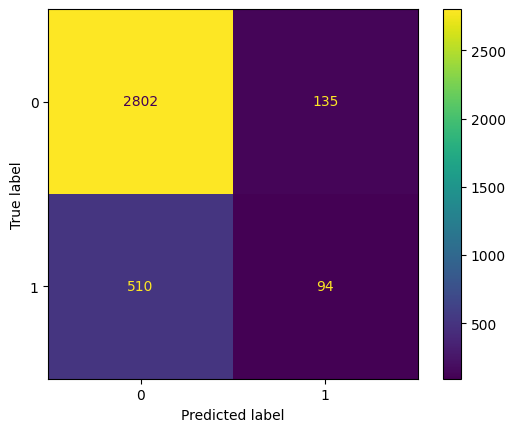

In [78]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

The logistic model shows some variables having a pretty strong correlation with an employees likelyhood to stay, but there is less magnitude in a coefficients predictive power for those who will leave. The department seems to have the lowest impact on prediction with RandD having the most prominent coefficient among departments at -0.5. Satisfaction: -3.75, work_accident: -1.31, and promotions: -1.15 have the largest magnitude and predict when an employee is less likely to leave. The largest positive coefficients are last_evaluation: 0.74, and time_spend_company: 0.53. The model has an accuracy of .82 however the model itself lacks reliable predictive power. Its only reliable for predicting employees who will stay, but poor at predicting employees who will leave. It made a significant number of false negative and false positive predictions and very few true positive predictions. The resulting metrics were Precision: 0.410480, Recall: 0.155629, F1 Score: 0.225690. While it had a decent accuracy metric further analysis of other metrics shows the model is unreliable. Exploring random forest and gradient boost models will hopefully deliver a more reliable predictive model.

In [90]:
# Create a function for storing model scores for comparison

def get_model_scores(model_type, test, pred):
    ac_score = metrics.accuracy_score(test, pred)
    pc_score = metrics.precision_score(test, pred)
    rc_score = metrics.recall_score(test, pred)
    f1_score = metrics.f1_score(test, pred)
    score_df = pd.DataFrame(
        {'Model': [model_type],
        'F1':  [f1_score],
        'Recall': [rc_score],
        'Precision': [pc_score],
        'Accuracy': [ac_score]
        }
    )
    score_df.head()
    return score_df


In [94]:
# Store logistic regression model scores
model_scores = pd.DataFrame()
model_scores = pd.concat(
    [model_scores, get_model_scores('LogisticRegression', y_test, y_pred)],
    ignore_index=True)
model_scores.head()

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.22569,0.155629,0.41048,0.817848


In [95]:
# Random forest
# New train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.20, stratify=y_train, random_state = 42)

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [96]:
rf = RandomForestClassifier(random_state=0)

cv_para = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_val = GridSearchCV(rf, cv_para, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)



In [97]:
%%time
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 1080 candidates, totalling 1080 fits
CPU times: user 4.51 s, sys: 821 ms, total: 5.33 s
Wall time: 10min 54s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 500]},
             refit='f1', verbose=1)

In [98]:
rf_val.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [99]:
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = None, 
                                min_samples_leaf = 1, min_samples_split = 5,
                                max_features = None, bootstrap = True, random_state = 0)

In [100]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_features=None, min_samples_split=5, random_state=0)

In [101]:
y_pred = rf_opt.predict(X_test)

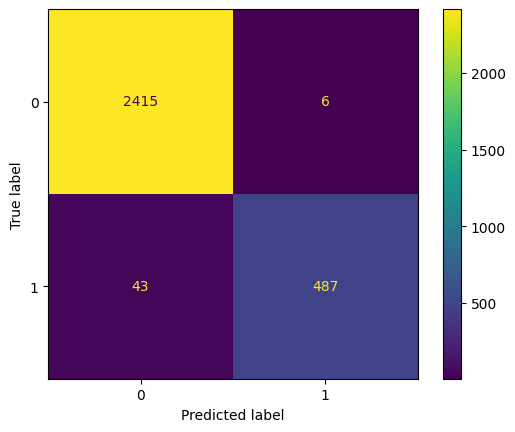

In [102]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

In [103]:
model_scores = pd.concat(
    [model_scores, get_model_scores('RandomForest', y_test, y_pred)],
    ignore_index=True)
model_scores.head()

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.225690,0.155629,0.41048,0.817848
1,RandomForest,0.952102,0.918868,0.98783,0.983395


The random forest model is dramatically more reliable than the logistic regression model. Extremely few false positives or false negatives and very high metric scores. Accuracy on the logistic regression was already fairly high but its over all predictive power was very low. The random forest model has an even higher accuracy score and its percision, recall, and F1 scores are each above .90. This model has great predictive power and can be reliably used to determine if an employee is at risk of leaving.

In [104]:
# XGBoost model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.20, stratify=y_train, random_state = 15)

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [105]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [106]:
cv_params = {
    'n_estimators': [10, 30, 50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 5],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1],
    'lambda': [0, 0.1],
    'alpha': [0, 0.1],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

In [117]:
scoring = {
    'recall': make_scorer(recall_score, zero_division=1),
    'f1': make_scorer(f1_score, zero_division=1),
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=1)
}

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = custom_split,
                      refit = 'f1',
                      verbose = 1
                     )

In [118]:
%%time
xgb_cv = xgb_cv.fit(X_train, y_train)

Fitting 1 folds for each of 768 candidates, totalling 768 fits
CPU times: user 2min 20s, sys: 2.38 s, total: 2min 22s
Wall time: 37.7 s


In [119]:
xgb_cv.best_params_

{'alpha': 0,
 'colsample_bytree': 0.8,
 'eval_metric': 'logloss',
 'gamma': 0,
 'lambda': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 50,
 'objective': 'binary:logistic',
 'subsample': 0.8}

In [120]:
xgb_opt = XGBClassifier(
    alpha= 0.1,
    colsample_bytree= 0.8,
    eval_metric= 'logloss',
    gamma= 0,
    reg_lambda= 0,
    learning_rate= 0.1,
    max_depth= 4,
    min_child_weight= 1,
    n_estimators= 50,
    objective='binary:logistic',
    subsample= 0.7)

In [121]:
xgb_opt.fit(X_train, y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [122]:
y_pred = rf_opt.predict(X_test)

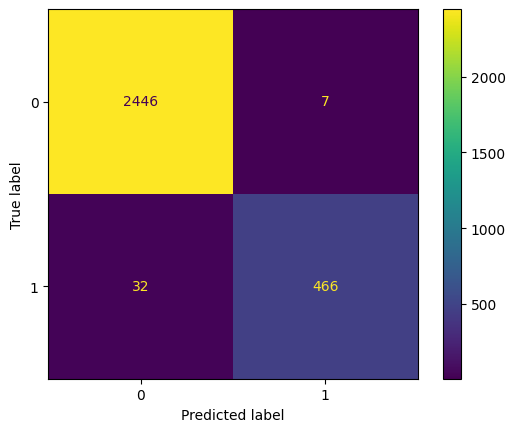

In [123]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

In [124]:
model_scores = pd.concat(
    [model_scores, get_model_scores('XGBoost', y_test, y_pred)],
    ignore_index=True)
model_scores.head()

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.225690,0.155629,0.410480,0.817848
1,RandomForest,0.952102,0.918868,0.987830,0.983395
2,XGBoost,0.959835,0.935743,0.985201,0.986784


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

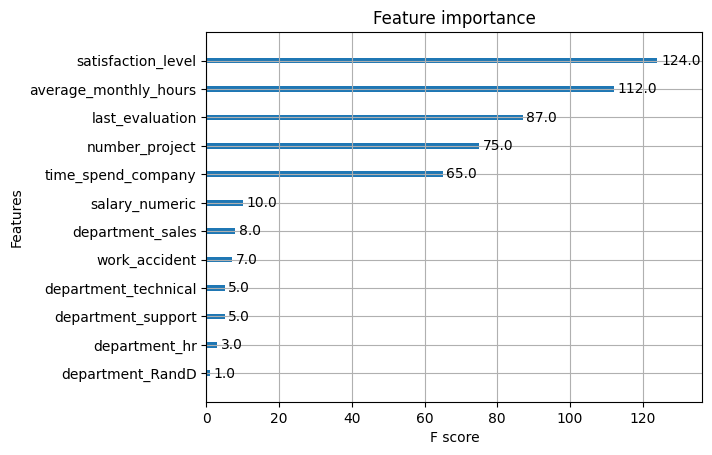

In [125]:
plot_importance(xgb_opt)

Final analysis of the model with the greatest predictive power have concluded that XGBoost is the most powerful model for predicting which employees are at risk of leaving the company. XGBoost and random forest models are both significantly more reliable than the logistic regression model and the XGboost model was slightly more reliable than the random forest having better metrics in all scores but precision. RF to XGB comparison is as follows accuracy was .983 to .987, recall .919 to .936, precision .988 to .985, and F1 was .952 to .960. Considering the metric of precision pertains to false positives it is of less concern than the recall and F1 metrics. Predicting an employee will leave but they do not is not as important to our goals as predicting an employee will stay but they end up leaving. That said both models perform exceptionally well and would both be reliable options for our use. After plotting the variable importances we can see satisfaction level as the most significant variable followed by last evaluation, average monthly hours, number of projects, and time spend company being the last notably significant variable. Importance levels drop off after that to fairly minimal values.

In conclusion action should be taken to address employee satisfaction. Perhaps a survey to identify common points which employees are dissapointed so we can directly address those issues. Satisfaction could be influenced by attending to the other high importance variables. Adjusting hours to fit the sweet spot we determined in EDA could improve satisfaction and adjusting the number of projects to fit their sweet spot could also influence satisfaction. Addressing those two issues can be an immediate action we can take. The survey will take time to gather, process, and analyze but will likely still be important for taking further action and worth the effort.